<a href="https://colab.research.google.com/github/KaustubhKhulbe/PneumaticCalcs/blob/main/Pivot_Spring_Counterbalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Spring Counter Balancing on Pivot***


###Imports

In [238]:
import math
import numpy as np
import matplotlib.pyplot as plt

###Inputs

***pivot*** - vector of pivot (grounded at (0, 0))

***cog*** - vector of cog from base of pivot

***weight*** - mass of bot in kg

***grounded_mount*** - fixed position of the spring

***dist from pivot to mount*** - not fixed / moving part


In [239]:
#pivot inputs
pivot = np.array([[0., 0.], [5., 5.]])
cog = np.array([[0., 0.], [1., 1.]]) #This is a point
weight = 10 #in kg

#spring inputs
grounded_mount = np.array([1., 1.])
dist_from_pivot_to_mount = 20
spring_const = 10

Gets the length of the $pivot$ and the distance from pivot ground to $cog$

In [240]:
piv_len = np.linalg.norm(pivot)

cog_dist = np.linalg.norm(cog)

###Gives the cog as pivot moves around
Usees the unit vector of input pivot

In [241]:
def get_cog_from_pivot(piv):
  pivot_unit_vec = piv / np.linalg.norm(piv)
  

  cog_vec = pivot_unit_vec * cog_dist

  return cog_vec

##Torque
Gives torque based on above calculation

$T_f = R_ (cg)  x W$

In [242]:
def torque(cogVec):
  weight_vec = np.array([cogVec[1], [cogVec[1][0], cogVec[1][1] + weight * 9.81]])
  torque = np.cross(cogVec, weight_vec)
  return torque

###Gives sub-calculation values


#####Given a pivot, it outputs the spring vector (start, end) and the pivot vector

In [243]:
def vectorGivenPivot(piv):
  pivot_unit_vec = piv / np.linalg.norm(piv)

  pivMount = pivot_unit_vec * dist_from_pivot_to_mount

  dist = (pivMount[1] - grounded_mount)

  return dist, pivMount

###Gives the torque the spring applies

$T_s F_s x r$ 

In [244]:
def torqueOfSpring(dist, pivMount):
  F_s = spring_const * dist
  T_s = np.cross(pivMount, F_s)

  return T_s

#Plotting everything!

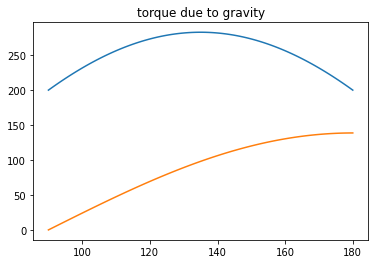

In [245]:
x = np.linspace(90, 180, 90)
y = x.copy()
y2 = x.copy()
for i in range(len(x)):
    temp_piv = np.array([
                         [0., 0.],
                         [piv_len * np.cos(np.radians(x[i])), piv_len * np.sin(np.radians(x[i]))]
    ])

    p1, p2 = vectorGivenPivot(temp_piv)

    y[i] = np.linalg.norm(torqueOfSpring(p1,p2))
    y2[i] = np.linalg.norm(torque(get_cog_from_pivot(temp_piv)))

plt.title("torque due to gravity")
plt.plot(x, y)
plt.plot(x, y2)